## Warm up

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import datetime

DATA_FOLDER = './Data/'

In [2]:
train = pd.read_csv(DATA_FOLDER+'train.csv')
train.tail()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4357331,6224518,1652603,47575,0,5,196.4,2,0,4,28,...,1,2721.0,0,24.56,0,0,3070.00,3,1475,0.8929
4357332,6224519,1653346,47592,2,2,358.1,4,3,2,7,...,0,0.0,0,0.00,0,0,2820.00,6,1484,0.7241
4357333,6224520,1657176,47679,0,3,559.0,4,1,3,8,...,0,0.0,0,0.00,1,0,400.60,2,1500,0.4483
4357334,6224521,1658403,47707,0,0,100.0,0,0,0,89,...,0,0.0,0,0.00,1,0,68.82,1,1502,0.1429
4357335,6224522,1658560,47710,0,2,126.3,1,1,0,24,...,0,0.0,0,0.00,0,0,2079.00,4,1517,0.8077


## Data formatting

Here I split the 3 different kind of game (eg 'solo' 'duo' and 'squad') because in a squad of four, one of them can die very quickly and still win the game. It will become a strong outlier for our future classifier.  

In [3]:
def formatGame(row):
    game = train[(train.matchId == row)]
    team = game.groupby(['Id','matchId','groupId','winPlacePerc'])['boosts','assists','kills','heals','DBNOs','damageDealt','headshotKills','rideDistance','walkDistance','weaponsAcquired'].sum().reset_index()
    team = team.set_index('Id')
    team = team.drop('groupId', axis=1)
    team = team.drop('matchId', axis=1)
    team['isWinner'] = team.winPlacePerc.map( lambda x: True if x == 1 else False)
    return team;

In [12]:
conditions = ['numGroups>80','numGroups>=40 & numGroups<=80','numGroups < 40']
name = ['solo','duo','squad']

for i in range(len(conditions)):
    dfGames = train.query(conditions[i])
    IDs = dfGames.matchId.unique()
    df = formatGame(IDs[0])
    for ID in tqdm(IDs):
        currentTeam = formatGame(ID)
        df = df.append(currentTeam)
    
    solo.to_csv(DATA_FOLDER + name[i] + '.csv', sep=',')

100%|██████████| 28642/28642 [1:39:50<00:00,  4.78it/s]


## Data analysis

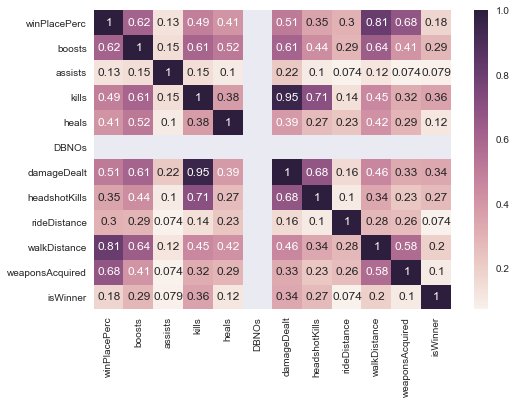

In [6]:
# plot the heatmap
corr = solo.corr()
ax = sns.heatmap(corr, annot=True)
plt.show()

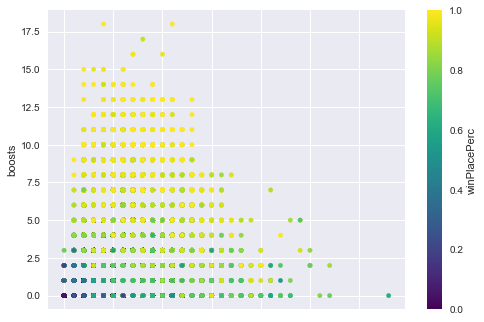

In [7]:
solo.plot.scatter(x='weaponsAcquired',y='boosts',c='winPlacePerc',colormap='viridis')
plt.show()